*Importing libraries* 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Importing DATA*

In [7]:
x = np.loadtxt("./inputs.txt")
y = np.loadtxt("./labels.txt")

In [8]:
x.shape, y.shape

((500, 100), (500,))

*Splitting the data into TRAIN, VALIDATION and TEST sets*

In [77]:
def split_data(y, x, ratio, seed=1):
    """
    split the dataset based on the split ratio into two sets. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    data = np.c_[y,x]
    end_point = np.int_(ratio*len(y))
    np.random.shuffle(data)
    training_x = data[:end_point,1:len(x[0,:])+1]
    training_y = data[:end_point,0]
    testing_x = data[end_point:,1:len(x[0,:])+1]
    testing_y = data[end_point:,0]
    
    return training_x, training_y, testing_x, testing_y
    raise NotImplementedError

In [78]:
### As the size of splitting wasn't mentioned
### I splitted the data set into two sets with size 80% and 20% with the sets being training set and testing set respectively
### Fruther to have a validation set I splitted the training set into 80% and 20% of the training set 
### The set with 80% of the elements is used as the training set and the other as validation set
training_x, training_y, testing_x, testing_y = split_data(y, x, 0.8, seed=1)
training_x, training_y, validation_x, validation_y = split_data(training_y, training_x, 0.8, seed=1)

In [79]:
#Here we can see the size of our training, validation and testing set and the size of complete data
training_x.shape, validation_x.shape, testing_x.shape, x.shape 

((320, 100), (80, 100), (100, 100), (500, 100))

*Least Square without regularisation*

In [31]:
# Calucalates the optimal weights using least squares and returns the root mean square error and optimal weights
def least_squares(y, tx):
    """calculate the least squares solution."""
    # returns mse, and optimal weights
    w = np.linalg.solve(tx.T@tx, tx.T@y)
    return np.sqrt(np.mean((y-(tx@w))**2)), w
    raise NotImplementedError

In [13]:
#Think about standardising data

In [80]:
#Adding the feature array of ones 
training_tx = np.c_[np.ones(len(training_y)), training_x]
validation_tx = np.c_[np.ones(len(validation_y)), validation_x]
testing_tx = np.c_[np.ones(len(testing_y)), testing_x]

In [81]:
#A little check to see if the features dimension increased by one
training_tx.shape

(320, 101)

In [32]:
#Computes the root mean square error
def compute_rmse(y, tx, w):
    """Calculate the rmse loss.

    Calculated the loss using mse.
    """
    e = y - (tx@w)
    loss = np.sqrt((1/(len(y))) * (e.T@e))
    return loss
    raise NotImplementedError

In [16]:
train_error = []
test_error = []

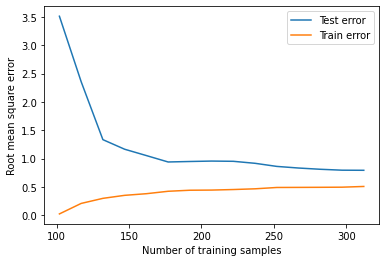

In [210]:
### Test error for different training set sizes
### Training set size in 102 to the full training set
train_error = []
test_error = []
training_samples = np.arange(102, len(training_y), 15)
for i in training_samples:
    train_err, w = least_squares(training_y[0:i], training_tx[0:i])
    test_err = compute_rmse(testing_y, testing_tx, w)
    train_error.append(train_err)
    test_error.append(test_err)

plt.plot(training_samples, test_error, label = "Test error")
plt.plot(training_samples, train_error, label = "Train error")
plt.xlabel("Number of training samples")
plt.ylabel("Root mean square error")
plt.legend()
plt.show()

Comment: As we can see the test error goes down as we increase the training set size, this goes in agreement with what 
we studied in our lectures that bigger the data size, i.e. more the data points, the better is the predicted model and
hence the test error goes down

*Least Square with Regularisation*

In [83]:
### adding a L2 regularization
def ridge_regression(y, tx, lambda_):
    """implementing ridge regression."""
    w = np.linalg.solve(( tx.T@tx + 2*len(y)*lambda_*np.identity(len(tx[0,:])) ), tx.T@y)
    return w
    raise NotImplementedError

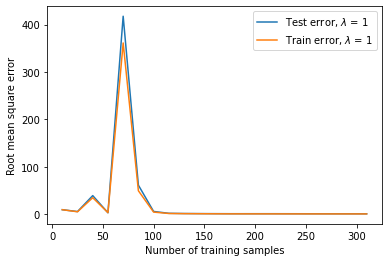

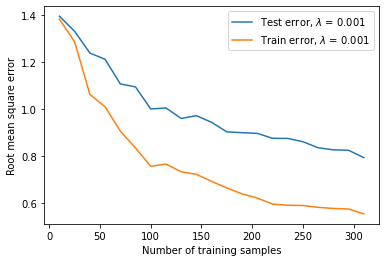

In [213]:
training_samples = np.arange(10, len(training_y), 15)
train_error = []
test_error = []
for i in training_samples:
    w = ridge_regression(training_y[0:i], training_tx[0:i], 0)
    test_err = compute_rmse(testing_y, testing_tx, w)
    train_err = compute_rmse(training_y, training_tx, w)
    #print (train_error)
    train_error.append(train_err)
    test_error.append(test_err)

plt.plot(training_samples, test_error, label = "Test error, $\lambda$ = 1")
plt.plot(training_samples, train_error, label = "Train error, $\lambda$ = 1")
plt.xlabel("Number of training samples")
plt.ylabel("Root mean square error")
plt.legend()
plt.show()

train_error = []
test_error = []
for i in training_samples:
    w = ridge_regression(training_y[0:i], training_tx[0:i], 0.001)
    test_err = compute_rmse(testing_y, testing_tx, w)
    #print (w.shape)
    train_err = compute_rmse(training_y, training_tx, w)
    train_error.append(train_err)
    test_error.append(test_err)

plt.plot(training_samples, test_error, label = "Test error, $\lambda$ = 0.001")
plt.plot(training_samples, train_error, label = "Train error, $\lambda$ = 0.001")
plt.xlabel("Number of training samples")
plt.ylabel("Root mean square error")
plt.legend()
plt.show()

COMMENT: 
1. As $\lambda$ is greater e.g. $\lambda = 1$ in our first case, we expect the regularization to penalise the weights more and hence we will tend to have weights with small magnitude, and that is why we see a jump in the error as the weights can grow as freely as they want and hence while testing those features give big error.

2. But when $\lambda$ is smaller that problem is resolved and we are penalising our loss mainly on the basis of the MSE, and another problem of not having an inverse of the X.T@X is resolved to as the small regularization lift up the eigen values from 0 to a non-zero value and hence we are able to solve for training samples less than the feature dimensions too

*Effect of regularisation strength on the optimal weights*

In [106]:
lambdas = np.linspace(0.001, 1, num = 100)
optimal_weights = np.zeros((100,100))
for i in range(1,100):
    for index, l in enumerate(lambdas):
        w = ridge_regression(training_y, training_tx, l)
        optimal_weights[index,i] = w[i]


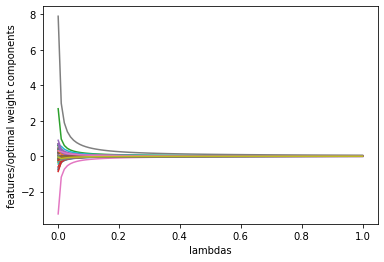

In [109]:
for i in range(1,100):
    plt.plot(lambdas,optimal_weights[:,i])

plt.xlabel("lambdas")
plt.ylabel("features/optimal weight components")
#plt.legend()
plt.show()


COMMENT: We can easily notice that increasing $\lambda$ makes the weight components go to zero as increasing $\lambda$ increases the loss if we have bigger weight components and as rigression aims to reduce the loss, the only good compromise it find is to make the weights go to 0.

*Finding optimal lambda for regularisation*

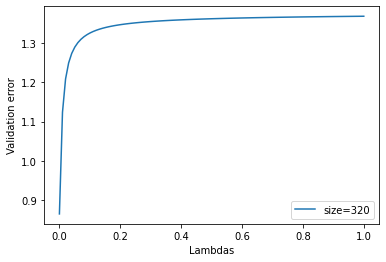

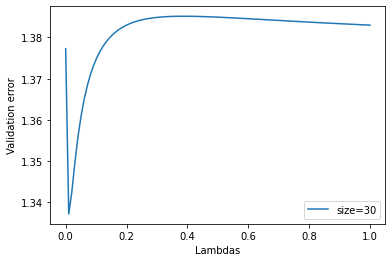

[0.0001, 0.010199999999999999]


In [215]:
lambdas = np.linspace(0.0001, 1, num = 100)
val_error = []
lambda_min = []
optimal_weights = np.zeros((2,101))
for index, size in enumerate(np.array([len(training_y),30])):
    val_error = []

    for l in (lambdas):
        w = ridge_regression(training_y[0:size], training_tx[0:size], l)
        val_err = compute_rmse(validation_y, validation_tx, w)
        val_error.append(val_err)
    #print(len(val_error),val_error[3])
    index_min = np.argmin(val_error)
    optimal_weights[index,:] = ridge_regression(training_y[0:size], training_tx[0:size], lambdas[index_min])
    lambda_min.append(lambdas[index_min])
    
    plt.plot(lambdas,val_error,label=("size=%d" %(size)))
    plt.ylabel("Validation error")
    plt.xlabel("Lambdas")
    plt.legend()
    plt.show()
    #plt.hold()
print(lambda_min)    


COMMENT: As the training set size increases, the optimal $\lambda^*$ value decreases. For the small training test size we need a regularisation as the problem of not having an X.T@X inverse exists, and hence a finite $\lambda$ does the job, and then what all is left is to find a $\lambda$ that does a good compromise between the optimal weights and loss and we can see that in the graph 2 above, there is a particular $\lambda$ for which the validation error is very low and hence we select that value. 

In the case where we have a more training samples, the regression can give a good fit without the need of a regularizer, and adding a regularizer just penalises optimal weights and hence our answer goes away from our optimal weights and we get a higher error as the $\lambda$ is increased in that case.

In [134]:
print ("optimal weights with training size 320 is ", optimal_weights[0])
print ("optimal weights with training size 30 is ", optimal_weights[1])


optimal weights with training size 320 is  [-1.10457319e-01 -8.11556971e-01 -9.95563821e-02  3.35262353e+00
  5.30008449e-01  2.25802833e-02  2.59722460e-01 -4.02798809e+00
  9.64380618e+00  2.39242110e-01 -4.02585368e-02  5.67122252e-02
  3.18472442e-01  3.38722039e-01 -1.06336322e-01 -1.93187489e-02
  5.62277545e-01  1.71565381e-01  2.00700861e-02  4.36380694e-01
  3.83882375e-01 -9.82147961e-03  4.02740916e-01  2.06348916e-01
  1.98364502e-01  1.26151162e-01  8.13494439e-01  5.16465673e-01
 -2.12561028e-01 -4.64127249e-01 -2.11213553e-02 -7.06829433e-01
  4.59680154e-01  5.76658242e-01 -1.38590923e-01  1.44837275e-01
 -8.22368928e-02 -2.74958949e-01  1.73633774e-01  2.02976024e-01
 -7.22057041e-02  7.48951611e-01 -4.52429817e-02 -1.58149180e-01
  6.04652405e-01  2.74539969e-01  1.30485256e-01 -2.58422878e-02
  2.35720359e-01 -2.39090345e-01  5.20364581e-01  1.97017575e-01
 -1.64372595e-01  4.48074585e-02 -4.28565196e-02  9.49561231e-01
 -1.89506055e-02  3.76345351e-02  2.67478809e-0

In [133]:
train_err1, w1 = least_squares(training_y[0:30], training_tx[0:30])
test_err1 = compute_rmse(testing_y, testing_tx, w1)

test_error = []
for i in range(2):
    test_err = compute_rmse(testing_y, testing_tx, optimal_weights[i])
    test_error.append(test_err)

print("test error for training size = 30 without regularisation is ", test_err1,"\n")
print("test error for training size = 320 with regularisation is ", test_error[0],"\n")
print("test error for training size = 30 with regularisation is ", test_error[1],"\n")
    #print (i)

test error for training size = 30 without regularisation is  5.986947980513126 

test error for training size = 320 is  0.7948617977481619 

test error for training size = 30 is  1.3047990769865117 



COMMENT: We can see that for the case where we only have 30 training samples, adding a regulariser does decrease the test error from 5.98 to 1.30 

*L1 Regularisation*

In [274]:
### Computes gradinet with the loss comprising of two terms: MSE and L1 regularisation
def compute_gradient(y, tx, w, lambda_):
    """Compute the gradient."""
    
    grad = ((-1/len(y)) * (tx.T@(y-tx@w))) + (lambda_ * np.tanh(w))
    print( ((tx.T@(y-tx@w)))[0:10], (lambda_ * np.sign(w))[0:10])
    return grad
    raise NotImplementedError

In [275]:
### Implements gradient descent with "max_iter" number of iterations
def gradient_descent(y, tx, initial_w, max_iters, gamma, lambda_):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    #ws = [initial_w]
    #losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        gradient = compute_gradient(y, tx, w, lambda_)
        #loss = compute_rmse(y, tx, w)
        #losses.append(loss)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * (gradient)
        #print(gradient)
        #ws.append(w)
        #losses.append(loss)
        #print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              #bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return compute_rmse(y, tx, w), w

In [276]:
losses, ws = gradient_descent(training_y, training_tx, np.zeros(101), 1000, 0.5, 0.1)

[-35.885319    -3.6232601   -2.11128827  10.62566842   1.05300351
   0.60495109   1.99540949 -13.0704547   33.72551279  -2.06972309] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[-17.81337919  -3.53006817  -2.00060396  10.50815435   1.02870593
   0.61637367   1.81189009 -12.92894831  33.41512162  -2.06172915] [-0.1 -0.1 -0.1  0.1  0.1  0.1  0.1 -0.1  0.1 -0.1]
[ -9.70936421  -3.48029452  -1.93707449  10.42182117   1.01651736
   0.61411465   1.7247461  -12.82371565  33.15983684  -2.04736348] [-0.1 -0.1 -0.1  0.1  0.1  0.1  0.1 -0.1  0.1 -0.1]
[ -6.07411328  -3.45040078  -1.89555232  10.35141174   1.00981767
   0.60619327   1.68106808 -12.73715838  32.93597512  -2.0307789 ] [-0.1 -0.1 -0.1  0.1  0.1  0.1  0.1 -0.1  0.1 -0.1]
[ -4.4432301   -3.42981814  -1.86471014  10.28997423   1.00563906
   0.5961731    1.65713305 -12.66124479  32.73247738  -2.01379359] [-0.1 -0.1 -0.1  0.1  0.1  0.1  0.1 -0.1  0.1 -0.1]
[ -3.71170229  -3.41378849  -1.83941453  10.23428367   1.00264983
   0.58562377   1.64229252 -1

In [277]:
losses

1.1511801424894679

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in matmul
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in matmul
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


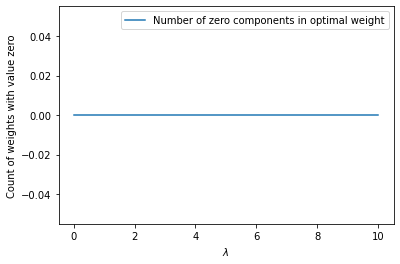

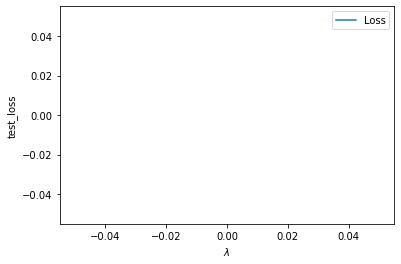

In [258]:
### Counts the number of weights which are zero vs lambda
number_count_zero = []
loss_with_different_lambda = []
for i in np.linspace(0.01,10,num=100):
    losses, ws = gradient_descent(training_y[0:30], training_tx[0:30], np.zeros(101), 500, 0.5, i)
    test_loss = compute_rmse(testing_y,testing_tx,ws)
    count = 0
    for i in range(len(ws)):
        if ws[i] < 0.001 and ws[i] > -0.001:
            count = count+1
    number_count_zero.append(count)
    loss_with_different_lambda.append(test_loss)
plt.plot(np.linspace(0.01,10,num=100),number_count_zero,label="Number of zero components in optimal weight")
plt.ylabel("Count of weights with value zero")
plt.xlabel("$\lambda$")
plt.legend()
plt.show()

plt.plot(np.linspace(0.01,10,num=100),loss_with_different_lambda, label="Loss")
plt.xlabel("$\lambda$")
plt.ylabel("test_loss")
plt.legend()
plt.show()

In [262]:
losses, ws = gradient_descent(training_y[0:30], training_tx[0:30], np.zeros(101), 100, 0.5, 0.00)
count = 0
for i in range(len(ws)):
    if ws[i] < 0.001 and ws[i] > -0.001:
        count = count+1
count

0

In [260]:
losses, ws = gradient_descent(training_y[0:30], training_tx[0:30], np.zeros(101), 100, 0.5, 0.1)
count = 0
for i in range(len(ws)):
    if ws[i] < 0.001 and ws[i] > -0.001:
        count = count+1
count

0

In [261]:
losses, ws = gradient_descent(training_y[0:30], training_tx[0:30], np.zeros(101), 100, 0.5, 1)
count = 0
for i in range(len(ws)):
    if ws[i] < 0.001 and ws[i] > -0.001:
        count = count+1
count

0

In [246]:
np.min(ws)

-0.47571394514034826

In [247]:
np.max(ws)

0.5065151731316229